# $\tau$-scaling
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from numba import njit
import palettable as pl
# emr = pl.cartocolors.sequential.Emrld_7_r.get_mpl_colormap()
# plt.style.use('Solarize_Light2')

In [2]:
from mon_jasnow import get_tau_scaling

In [8]:
Tc = 2 /(np.log(1+np.sqrt(2)))

In [38]:
N_list =np.arange(16, 200, 16)
N_points =20
T = np.linspace(0.8*Tc, Tc, N_points)
N_sweeps = 20000
N_runs = 1
skips = 3

In [ ]:
%time tau_scaling = get_tau_scaling(N_list, T, N_sweeps, N_runs, skips)
np.save(f"tau/scaling_Sweeps{N_sweeps}_skips{skips}", [tau_scaling, N_list, T])

In [20]:
X, Y = np.meshgrid(N_list, T)

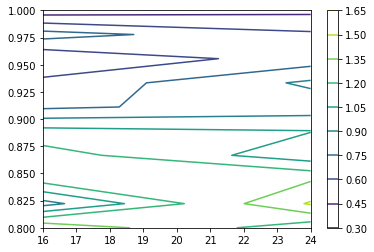

In [27]:
plt.contour(X, Y/Tc, tau_scaling.T)
plt.colorbar()

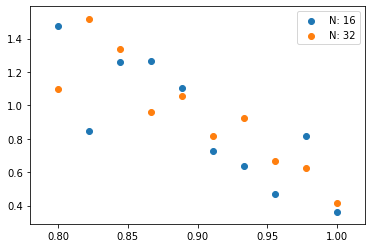

In [36]:
for i,tau in enumerate(tau_scaling):
    plt.scatter(T/Tc, tau, label =f"N: {N_list[i]}")
plt.legend()
plt.show()
